In [1]:
import numpy as np
import pandas as pd

In [2]:
from prettytable import PrettyTable
import matplotlib.pylab as plt
import seaborn as sns
import math 

In [3]:
import json
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, remove_stopwords
import json

In [5]:
mpstDF= pd.read_csv("..\Dataset\mpst.csv")
mpstDF

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb
...,...,...,...,...,...,...
14823,tt0219952,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...","comedy, murder",test,wikipedia
14824,tt1371159,Iron Man 2,"In Russia, the media covers Tony Stark's discl...","good versus evil, violence",train,wikipedia
14825,tt0063443,Play Dirty,During the North African Campaign in World War...,anti war,train,wikipedia
14826,tt0039464,High Wall,Steven Kenet catches his unfaithful wife in th...,murder,test,wikipedia


In [6]:
# TO SEE HOW MANY NAN VALUES WE HAVE IN DATASET

mpstDF_onlyNAN = mpstDF[mpstDF.isnull().any(axis=1)]
mpstDF_onlyNAN

,imdb_id,title,plot_synopsis,tags,split,synopsis_source


SO there are no columns which have NAN value

In [7]:
strTokenizer= CountVectorizer(tokenizer=lambda x:x.split(", "), binary=True)
y= strTokenizer.fit_transform(mpstDF["tags"]).toarray()

In [8]:
y
np.savez("Y.npz",y)

In [9]:
y_df= pd.DataFrame(y,columns=strTokenizer.get_feature_names())
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(y_df)
y_df.to_csv("y_df.csv")

,absurd,action,adult comedy,allegory,alternate history,alternate reality,anti war,atmospheric,autobiographical,avant garde,blaxploitation,bleak,boring,brainwashing,christian film,claustrophobic,clever,comedy,comic,cruelty,cult,cute,dark,depressing,dramatic,entertaining,fantasy,feel-good,flashback,good versus evil,gothic,grindhouse film,haunting,historical,historical fiction,home movie,horror,humor,insanity,inspiring,intrigue,magical realism,melodrama,murder,mystery,neo noir,non fiction,paranormal,philosophical,plot twist,pornographic,prank,psychedelic,psychological,queer,realism,revenge,romantic,sadist,satire,sci-fi,sentimental,storytelling,stupid,suicidal,suspenseful,thought-provoking,tragedy,violence,western,whimsical
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14823,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14825,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now Merging both dataframes y_df and dataset to get a sparce matrix that will contain 1 if the movie is tagged with the genre and 0 otherwise.

In [10]:
final_mpstDF=mpstDF.join(y_df)
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(final_mpstDF)


,imdb_id,title,plot_synopsis,tags,split,synopsis_source,absurd,action,adult comedy,allegory,alternate history,alternate reality,anti war,atmospheric,autobiographical,avant garde,blaxploitation,bleak,boring,brainwashing,christian film,claustrophobic,clever,comedy,comic,cruelty,cult,cute,dark,depressing,dramatic,entertaining,fantasy,feel-good,flashback,good versus evil,gothic,grindhouse film,haunting,historical,historical fiction,home movie,horror,humor,insanity,inspiring,intrigue,magical realism,melodrama,murder,mystery,neo noir,non fiction,paranormal,philosophical,plot twist,pornographic,prank,psychedelic,psychological,queer,realism,revenge,romantic,sadist,satire,sci-fi,sentimental,storytelling,stupid,suicidal,suspenseful,thought-provoking,tragedy,violence,western,whimsical
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14823,tt0219952,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...","comedy, murder",test,wikipedia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14824,tt1371159,Iron Man 2,"In Russia, the media covers Tony Stark's discl...","good versus evil, violence",train,wikipedia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14825,tt0063443,Play Dirty,During the North African Campaign in World War...,anti war,train,wikipedia,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14826,tt0039464,High Wall,Steven Kenet catches his unfaithful wife in th...,murder,test,wikipedia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


TOTAL DATA POINTS FOR EACH CATEGORY IN MASTER DATASET

In [11]:
label_list=strTokenizer.get_feature_names()

In [12]:
count_of_rows_for_label={}
for x in label_list:
    count_of_rows_for_label[x]=final_mpstDF[x].sum()
count_of_rows_for_label

{&#39;absurd&#39;: 270,
 &#39;action&#39;: 664,
 &#39;adult comedy&#39;: 128,
 &#39;allegory&#39;: 139,
 &#39;alternate history&#39;: 102,
 &#39;alternate reality&#39;: 205,
 &#39;anti war&#39;: 118,
 &#39;atmospheric&#39;: 396,
 &#39;autobiographical&#39;: 44,
 &#39;avant garde&#39;: 220,
 &#39;blaxploitation&#39;: 74,
 &#39;bleak&#39;: 211,
 &#39;boring&#39;: 525,
 &#39;brainwashing&#39;: 107,
 &#39;christian film&#39;: 42,
 &#39;claustrophobic&#39;: 84,
 &#39;clever&#39;: 87,
 &#39;comedy&#39;: 1859,
 &#39;comic&#39;: 114,
 &#39;cruelty&#39;: 442,
 &#39;cult&#39;: 2647,
 &#39;cute&#39;: 197,
 &#39;dark&#39;: 405,
 &#39;depressing&#39;: 205,
 &#39;dramatic&#39;: 412,
 &#39;entertaining&#39;: 749,
 &#39;fantasy&#39;: 564,
 &#39;feel-good&#39;: 76,
 &#39;flashback&#39;: 2937,
 &#39;good versus evil&#39;: 875,
 &#39;gothic&#39;: 441,
 &#39;grindhouse film&#39;: 66,
 &#39;haunting&#39;: 151,
 &#39;historical&#39;: 272,
 &#39;historical fiction&#39;: 143,
 &#39;home movie&#39;: 153,
 &#39

In [13]:
sorted_count_of_rows_for_label=sorted(count_of_rows_for_label.items(), key=lambda x: x[1], reverse=True)
sorted_count_of_rows_for_label

[(&#39;murder&#39;, 5782),
 (&#39;violence&#39;, 4426),
 (&#39;flashback&#39;, 2937),
 (&#39;romantic&#39;, 2906),
 (&#39;cult&#39;, 2647),
 (&#39;revenge&#39;, 2468),
 (&#39;psychedelic&#39;, 1897),
 (&#39;comedy&#39;, 1859),
 (&#39;suspenseful&#39;, 1086),
 (&#39;good versus evil&#39;, 875),
 (&#39;humor&#39;, 822),
 (&#39;satire&#39;, 816),
 (&#39;entertaining&#39;, 749),
 (&#39;neo noir&#39;, 745),
 (&#39;action&#39;, 664),
 (&#39;sadist&#39;, 652),
 (&#39;insanity&#39;, 636),
 (&#39;tragedy&#39;, 597),
 (&#39;fantasy&#39;, 564),
 (&#39;paranormal&#39;, 546),
 (&#39;boring&#39;, 525),
 (&#39;mystery&#39;, 519),
 (&#39;horror&#39;, 486),
 (&#39;melodrama&#39;, 457),
 (&#39;cruelty&#39;, 442),
 (&#39;gothic&#39;, 441),
 (&#39;dramatic&#39;, 412),
 (&#39;dark&#39;, 405),
 (&#39;atmospheric&#39;, 396),
 (&#39;storytelling&#39;, 364),
 (&#39;sci-fi&#39;, 309),
 (&#39;psychological&#39;, 289),
 (&#39;historical&#39;, 272),
 (&#39;absurd&#39;, 270),
 (&#39;prank&#39;, 255),
 (&#39;sentime

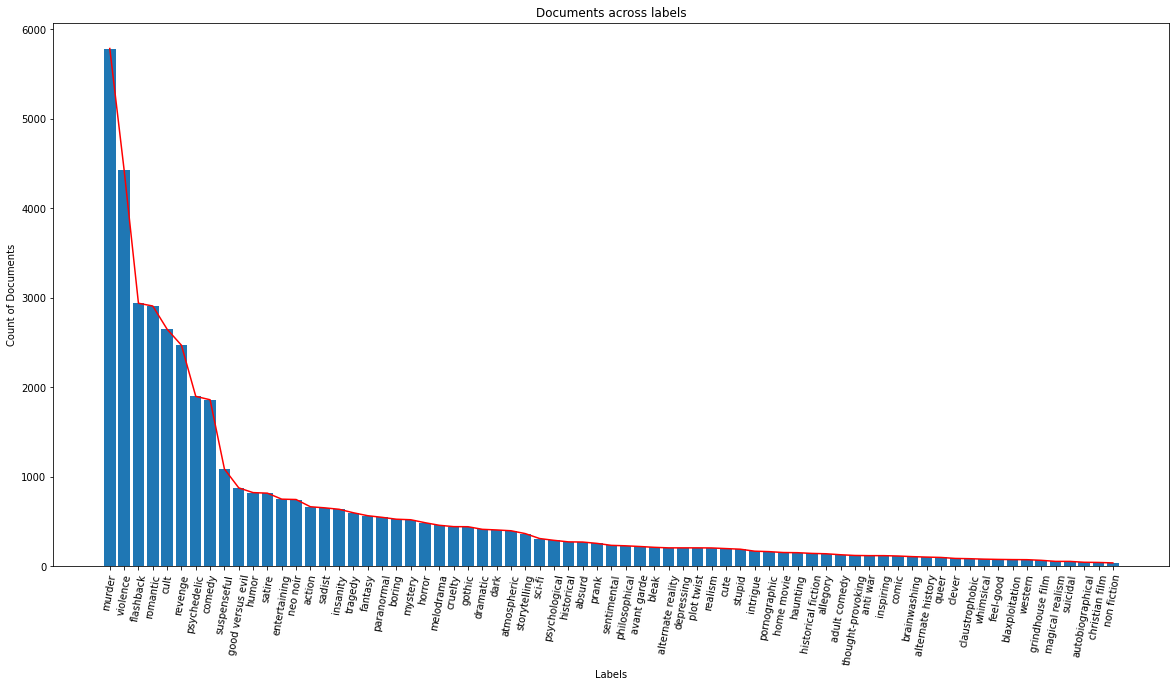

In [14]:

# print(sorted_count_of_rows_for_label)
x, y = zip(*sorted_count_of_rows_for_label) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.title("Documents across labels")
plt.xticks(rotation=80)
plt.xlabel("Labels")
plt.ylabel("Count of Documents")
plt.bar(x,y)
plt.plot(x, y,color='red')

plt.show()

GETTING THE SPILTS FOR EACH DATASET

In [15]:
final_mpstDF_train=final_mpstDF[final_mpstDF["split"]=="train"]
final_mpstDF_validation=final_mpstDF[final_mpstDF["split"]=="val"]
final_mpstDF_test=final_mpstDF[final_mpstDF["split"]=="test"]
print("Shape Train",final_mpstDF_train.shape)
print("Shape Validation",final_mpstDF_validation.shape)
print("Shape Test",final_mpstDF_test.shape)

Shape Train (9489, 77)
Shape Validation (2373, 77)
Shape Test (2966, 77)


TOTAL DATA POINTS FOR EACH CATEGORY IN TRAIN DATASET

In [16]:
#label_list=strTokenizer.get_feature_names()
def getCountShowPlot(label_list, dataset, heading, sorted=False):
    count_of_rows_for_label={}
    for x in label_list:
        count_of_rows_for_label[x]=dataset[x].sum()
    if sorted:
        count_of_rows_for_label=sorted(count_of_rows_for_label.items(), key=lambda x: x[1], reverse=True)
    else:
        count_of_rows_for_label = list(count_of_rows_for_label.items())
    # print(count_of_rows_for_label)
    x, y = zip(*count_of_rows_for_label) # unpack a list of pairs into two tuples
    plt.figure(figsize=(20,10))
    plt.title("Documents across labels For " + heading)
    plt.xticks(rotation=80)
    plt.xlabel("Labels")
    plt.ylabel("Count of Documents")
    plt.bar(x,y)
    plt.plot(x, y,color='red')

    plt.show()

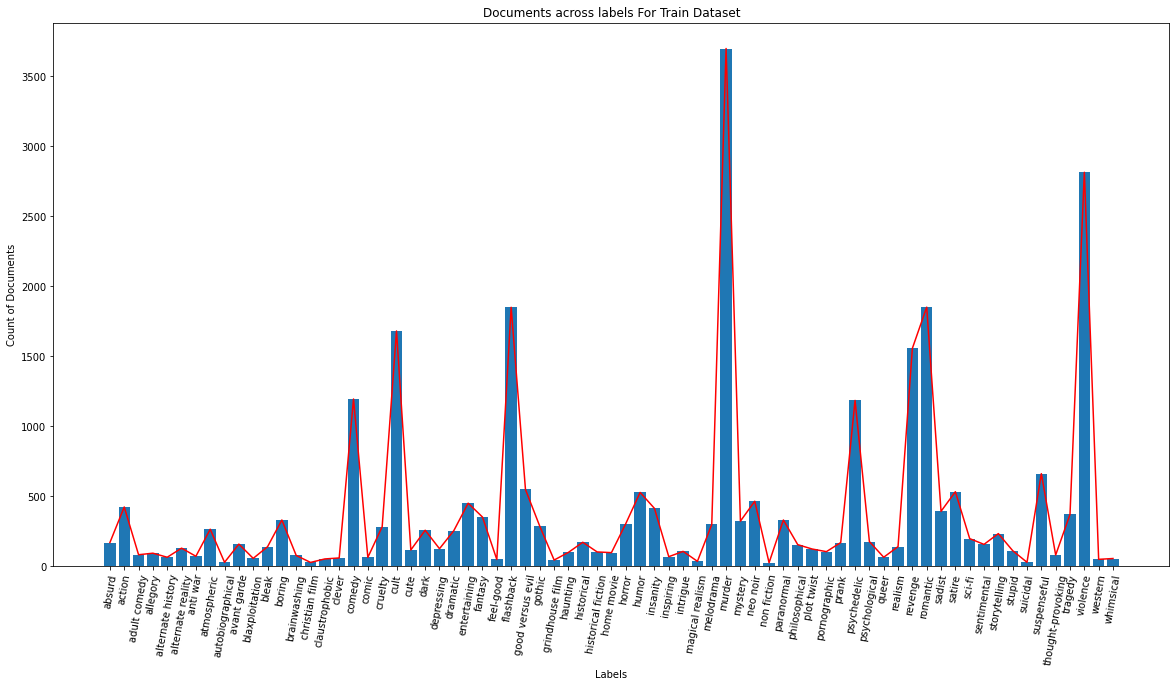

In [17]:
getCountShowPlot(label_list,final_mpstDF_train,"Train Dataset")

TOTAL DATA POINTS FOR EACH CATEGORY IN VALIDATION DATASET

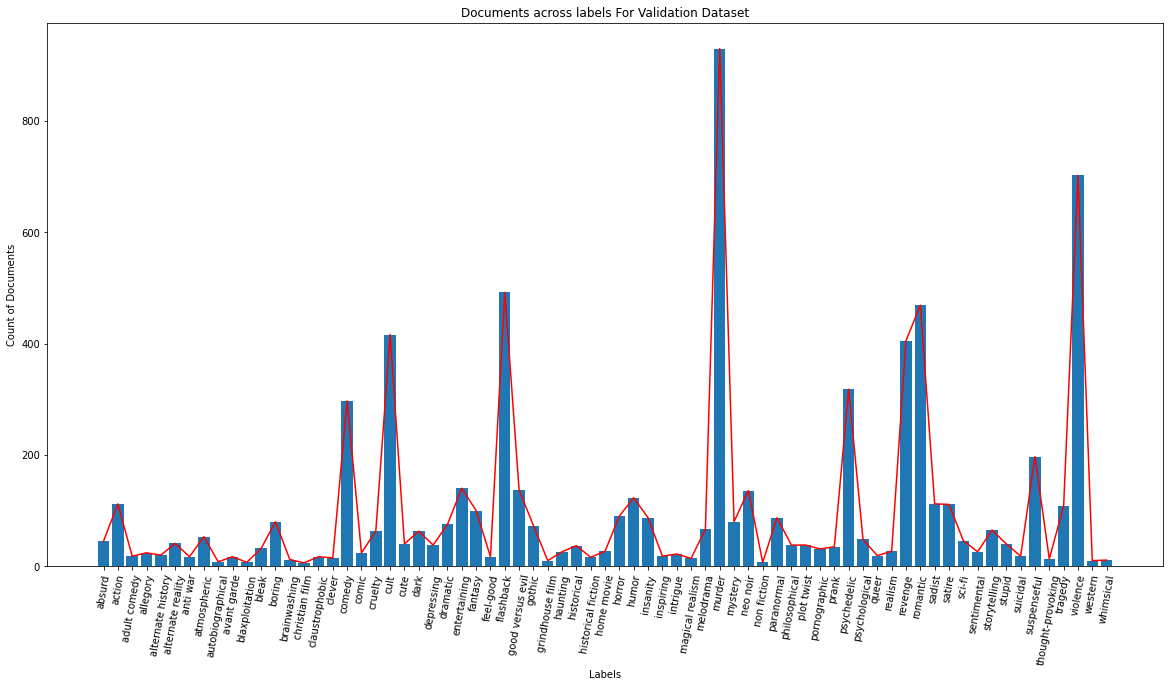

In [18]:
getCountShowPlot(label_list,final_mpstDF_validation,"Validation Dataset")


TOTAL DATA POINTS FOR EACH CATEGORY IN TEST DATASET

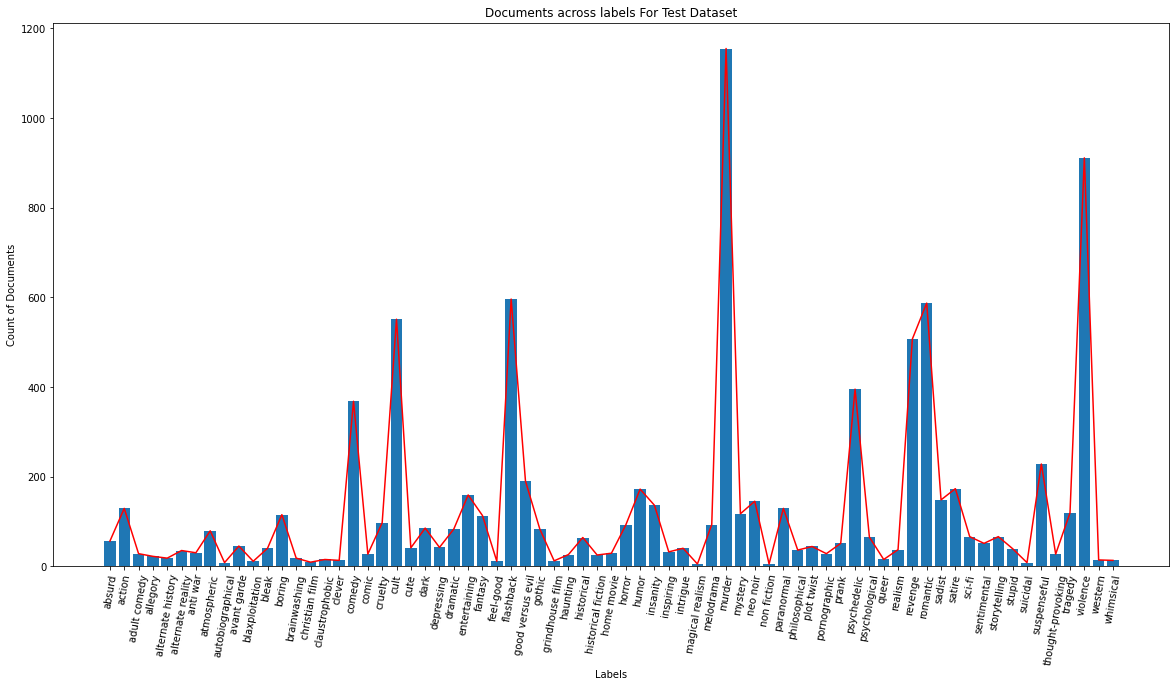

In [19]:
getCountShowPlot(label_list,final_mpstDF_test,"Test Dataset")


*Observation* : Each of the dataset have same distribution for the count of rows in each of the tags

Getting the length of characters for each of the documents

In [20]:
final_mpstDF["synopses_char_length"]=final_mpstDF["plot_synopsis"].apply(lambda x: len(x))
final_mpstDF["synopses_word_length"]=final_mpstDF["plot_synopsis"].apply(lambda x: len(x.split()))
final_mpstDF[["plot_synopsis","synopses_char_length","synopses_word_length"]]

,plot_synopsis,synopses_char_length,synopses_word_length
0,Note: this synopsis is for the orginal Italian...,7527,1315
1,"Two thousand years ago, Nhagruul the Foul, a s...",2077,378
2,"Matuschek's, a gift store in Budapest, is the ...",4003,707
3,"Glenn Holland, not a morning person by anyone'...",13215,2317
4,"In May 1980, a Cuban man named Tony Montana (A...",17575,3063
...,...,...,...
14823,"In 1988 Russ Richards (John Travolta), the wea...",2607,441
14824,"In Russia, the media covers Tony Stark's discl...",3241,546
14825,During the North African Campaign in World War...,2483,415
14826,Steven Kenet catches his unfaithful wife in th...,2281,378


In [21]:
print("Max Synopses Length: {} characters, {} words ".format(final_mpstDF["synopses_char_length"].max(), final_mpstDF["synopses_word_length"].max()))
print("Average Synopses Length: {} characters, {} words ".format(final_mpstDF["synopses_char_length"].mean(), final_mpstDF["synopses_word_length"].mean()))
print("Min Synopses Length: {} characters, {} words ".format(final_mpstDF["synopses_char_length"].min(), final_mpstDF["synopses_word_length"].min()))


Max Synopses Length: 63959 characters, 11406 words 
Average Synopses Length: 5139.938090099811 characters, 895.7004990558403 words 
Min Synopses Length: 442 characters, 67 words 


In [22]:
countTable=PrettyTable()
countTable.field_names = ["Length", "Max", "Mean", "Min"]
countTable.add_row(["Characters",final_mpstDF["synopses_char_length"].max(), math.floor(final_mpstDF["synopses_char_length"].mean()), final_mpstDF["synopses_char_length"].min()])
countTable.add_row(["Words",final_mpstDF["synopses_word_length"].max(), math.floor(final_mpstDF["synopses_word_length"].mean()), final_mpstDF["synopses_word_length"].min()])

print(countTable)

+------------+-------+------+-----+
|   Length   |  Max  | Mean | Min |
+------------+-------+------+-----+
| Characters | 63959 | 5139 | 442 |
|   Words    | 11406 | 895  |  67 |
+------------+-------+------+-----+


FOR report two datarows

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(mpstDF.head(4))

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb


In [24]:
final_mpstDF_test.sum(axis=0,numeric_only=True)

absurd                56
action               129
adult comedy          28
allegory              22
alternate history     18
                    ... 
thought-provoking     27
tragedy              119
violence             911
western               14
whimsical             13
Length: 71, dtype: int64

TAGS FOR EACH DATA ROW

In [25]:
mpstDF["tag_count"]=y_df.sum(axis=1)

In [26]:
mpstDF

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,tag_count
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,5
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,1
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,1
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,4
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,10
...,...,...,...,...,...,...,...
14823,tt0219952,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...","comedy, murder",test,wikipedia,2
14824,tt1371159,Iron Man 2,"In Russia, the media covers Tony Stark's discl...","good versus evil, violence",train,wikipedia,2
14825,tt0063443,Play Dirty,During the North African Campaign in World War...,anti war,train,wikipedia,1
14826,tt0039464,High Wall,Steven Kenet catches his unfaithful wife in th...,murder,test,wikipedia,1


In [27]:
tagCountTable=PrettyTable()
tagCountTable.field_names = ["Count", "Value"]
tagCountTable.add_row(["MAX TAGS",mpstDF["tag_count"].max()])
tagCountTable.add_row(["MEAN TAGS", math.floor(mpstDF["tag_count"].mean())])
tagCountTable.add_row(["MIN TAGS",mpstDF["tag_count"].min()])
print(tagCountTable)

+-----------+-------+
|   Count   | Value |
+-----------+-------+
|  MAX TAGS |   25  |
| MEAN TAGS |   2   |
|  MIN TAGS |   1   |
+-----------+-------+


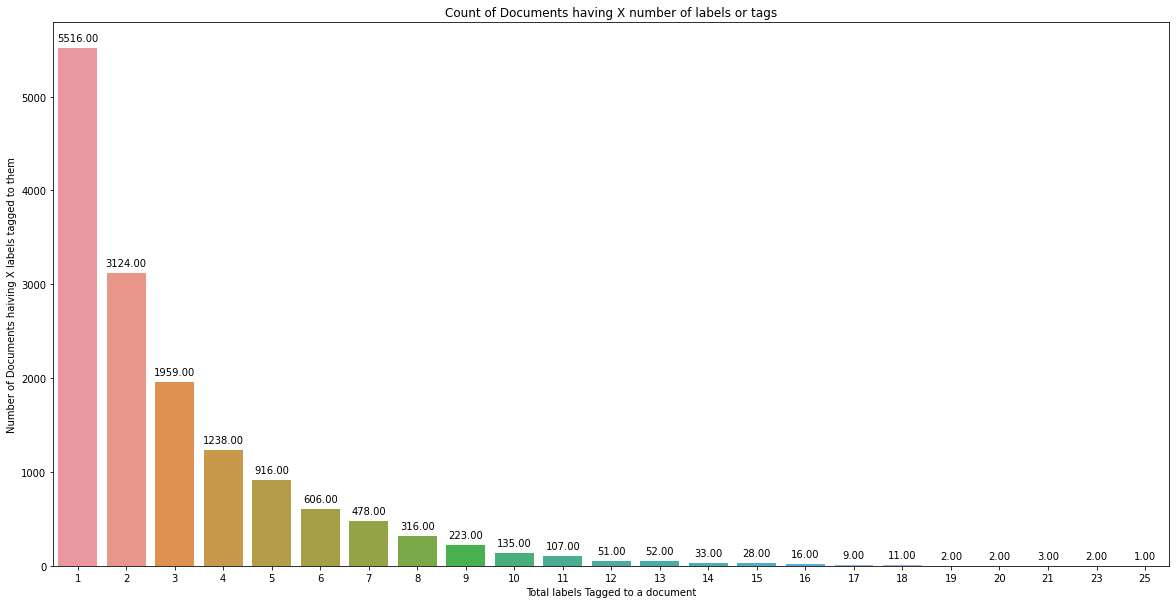

In [28]:
plt.figure(figsize=(20,10))
splot=sns.countplot(mpstDF["tag_count"])
plt.title("Count of Documents having X number of labels or tags")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
# plt.xticks(rotation=80)
plt.xlabel("Total labels Tagged to a document")
plt.ylabel("Number of Documents haiving X labels tagged to them")
plt.show()

FINDING N-GRAMS FOR EACH DOCUMENT

In [29]:


def getMostCommonNGramForTag(tag,df,n, verbose=False):
    # first get individual words
    df_for_tag=df[df[tag]==1]
    df_for_tag=df_for_tag[["title","plot_synopsis","processed_synopsis_4","processed_synopsis_3_2"]]
    if n==4:
        df_for_tag["n-gram"]= df_for_tag["processed_synopsis_4"].apply(lambda x: collections.Counter(ngrams(x.split(),n)).most_common(10))
    else:
        df_for_tag["n-gram"]= df_for_tag["processed_synopsis_3_2"].apply(lambda x: collections.Counter(ngrams(x.split(),n)).most_common(10))
    if verbose:
        display(df_for_tag)
    # tokenized = text.split()
    # collections.Counter(esBigrams)
    # # and get a list of all the n-grams
    # esBigrams = ngrams(tokenized, n)
    singleDocument=df_for_tag["processed_synopsis_4"].to_list()  if n==4 else df_for_tag["processed_synopsis_3_2"].to_list() 
    finalDoc= " ; ".join(singleDocument)
    NGramsFile = open("ngrams.txt", "a")  
    with open("ngrams.txt", "a") as NGramsFile: 
        # Writing data to a file
        NGramsFile.write("\nFor "+str(n)+" Grams")
        json.dump(collections.Counter(ngrams(finalDoc.split(),n)).most_common(20), NGramsFile, indent = 1) 
        NGramsFile.write("\n")
  
    # print(collections.Counter(ngrams(finalDoc.split(),n)).most_common(20))

In [30]:
preprocessed_final_mpstDF= final_mpstDF.copy()
CUSTOM_FILTERS =[lambda x: x.lower(), strip_tags, remove_stopwords,strip_punctuation]
preprocessed_final_mpstDF["processed_synopsis_4"]=preprocessed_final_mpstDF["plot_synopsis"].apply(lambda x: " ".join(preprocess_string(x, [lambda x: x.lower(), strip_tags, remove_stopwords,strip_punctuation])))
preprocessed_final_mpstDF["processed_synopsis_3_2"]=preprocessed_final_mpstDF["plot_synopsis"].apply(lambda x: " ".join(preprocess_string(x, [lambda x: x.lower(), strip_tags, remove_stopwords])))

Convert the below markdown cells to Code cells to see and generate the n-grams  for each tag


getMostCommonNGramForTag("murder",preprocessed_final_mpstDF,4)


getMostCommonNGramForTag("murder",preprocessed_final_mpstDF,3)


getMostCommonNGramForTag("murder",preprocessed_final_mpstDF,2)

for x in y_df.columns:
    print("FOR TAG: ",x)
    with open("ngrams.txt", "a") as NGramsFile: 
        # Writing data to a file
        NGramsFile.write("\nFOR TAG: "+x)
        print("\nMost Common For "+x)
    
    print("At 4-grams")
    getMostCommonNGramForTag(x,preprocessed_final_mpstDF,4)
    print("At 3-grams")
    getMostCommonNGramForTag(x,preprocessed_final_mpstDF,3)
    print("At 2-grams")
    getMostCommonNGramForTag(x,preprocessed_final_mpstDF,2)
    print("At 1-grams")
    getMostCommonNGramForTag(x,preprocessed_final_mpstDF,1)
    with open("ngrams.txt", "a") as NGramsFile: 
        # Writing data to a file
        NGramsFile.write("\nEND FOR "+x)
    print("END FOR ",x)
    



Saving the dataset as 3 different files for train,validation, and test

In [33]:
final_mpstDF_train.to_csv("final_mpstDF_train.csv", del)
final_mpstDF_validation.to_csv("final_mpstDF_val.csv")
final_mpstDF_test.to_csv("final_mpstDF_test.csv")
# final_mpstDF_train.to_excel("final_mpstDF_train.xlsx")
# final_mpstDF_validation.to_excel("final_mpstDF_val.xlsx")
# final_mpstDF_test.to_excel("final_mpstDF_test.xlsx")

Testing if the files got saved properly

In [34]:
 # READING FILES:
 train_test_csv=pd.read_csv("final_mpstDF_train.csv",)
#  train_test_excel=pd.read_excel("final_mpstDF_train.xlsx")
 val_test_csv=pd.read_csv("final_mpstDF_val.csv")
#  val_test_excel=pd.read_excel("final_mpstDF_val.xlsx")
 test_test_csv=pd.read_csv("final_mpstDF_test.csv")
#  test_test_excel=pd.read_excel("final_mpstDF_test.xlsx")


In [43]:
def getNANVals(df,df_nm):
    print(df_nm)
    print(df.columns)
    display(df[df.isnull().any(axis=1)])

In [44]:
df_dict={
    "train_test_csv":train_test_csv,
# "train_test_excel":train_test_excel,
"val_test_csv":val_test_csv,
# "val_test_excel":val_test_excel,
"test_test_csv":test_test_csv,
# "test_test_excel":test_test_excel,
}


In [45]:
for x in df_dict.keys():
    getNANVals(df_dict[x],x)

train_test_csv
Index([&#39;Unnamed: 0&#39;, &#39;imdb_id&#39;, &#39;title&#39;, &#39;plot_synopsis&#39;, &#39;tags&#39;, &#39;split&#39;,
       &#39;synopsis_source&#39;, &#39;absurd&#39;, &#39;action&#39;, &#39;adult comedy&#39;, &#39;allegory&#39;,
       &#39;alternate history&#39;, &#39;alternate reality&#39;, &#39;anti war&#39;, &#39;atmospheric&#39;,
       &#39;autobiographical&#39;, &#39;avant garde&#39;, &#39;blaxploitation&#39;, &#39;bleak&#39;, &#39;boring&#39;,
       &#39;brainwashing&#39;, &#39;christian film&#39;, &#39;claustrophobic&#39;, &#39;clever&#39;, &#39;comedy&#39;,
       &#39;comic&#39;, &#39;cruelty&#39;, &#39;cult&#39;, &#39;cute&#39;, &#39;dark&#39;, &#39;depressing&#39;, &#39;dramatic&#39;,
       &#39;entertaining&#39;, &#39;fantasy&#39;, &#39;feel-good&#39;, &#39;flashback&#39;, &#39;good versus evil&#39;,
       &#39;gothic&#39;, &#39;grindhouse film&#39;, &#39;haunting&#39;, &#39;historical&#39;,
       &#39;historical fiction&#39;, &#39;home movie&#3

,Unnamed: 0,imdb_id,title,plot_synopsis,tags,split,synopsis_source,absurd,action,adult comedy,...,sentimental,storytelling,stupid,suicidal,suspenseful,thought-provoking,tragedy,violence,western,whimsical


val_test_csv
Index([&#39;Unnamed: 0&#39;, &#39;imdb_id&#39;, &#39;title&#39;, &#39;plot_synopsis&#39;, &#39;tags&#39;, &#39;split&#39;,
       &#39;synopsis_source&#39;, &#39;absurd&#39;, &#39;action&#39;, &#39;adult comedy&#39;, &#39;allegory&#39;,
       &#39;alternate history&#39;, &#39;alternate reality&#39;, &#39;anti war&#39;, &#39;atmospheric&#39;,
       &#39;autobiographical&#39;, &#39;avant garde&#39;, &#39;blaxploitation&#39;, &#39;bleak&#39;, &#39;boring&#39;,
       &#39;brainwashing&#39;, &#39;christian film&#39;, &#39;claustrophobic&#39;, &#39;clever&#39;, &#39;comedy&#39;,
       &#39;comic&#39;, &#39;cruelty&#39;, &#39;cult&#39;, &#39;cute&#39;, &#39;dark&#39;, &#39;depressing&#39;, &#39;dramatic&#39;,
       &#39;entertaining&#39;, &#39;fantasy&#39;, &#39;feel-good&#39;, &#39;flashback&#39;, &#39;good versus evil&#39;,
       &#39;gothic&#39;, &#39;grindhouse film&#39;, &#39;haunting&#39;, &#39;historical&#39;,
       &#39;historical fiction&#39;, &#39;home movie&#39;

,Unnamed: 0,imdb_id,title,plot_synopsis,tags,split,synopsis_source,absurd,action,adult comedy,...,sentimental,storytelling,stupid,suicidal,suspenseful,thought-provoking,tragedy,violence,western,whimsical


test_test_csv
Index([&#39;Unnamed: 0&#39;, &#39;imdb_id&#39;, &#39;title&#39;, &#39;plot_synopsis&#39;, &#39;tags&#39;, &#39;split&#39;,
       &#39;synopsis_source&#39;, &#39;absurd&#39;, &#39;action&#39;, &#39;adult comedy&#39;, &#39;allegory&#39;,
       &#39;alternate history&#39;, &#39;alternate reality&#39;, &#39;anti war&#39;, &#39;atmospheric&#39;,
       &#39;autobiographical&#39;, &#39;avant garde&#39;, &#39;blaxploitation&#39;, &#39;bleak&#39;, &#39;boring&#39;,
       &#39;brainwashing&#39;, &#39;christian film&#39;, &#39;claustrophobic&#39;, &#39;clever&#39;, &#39;comedy&#39;,
       &#39;comic&#39;, &#39;cruelty&#39;, &#39;cult&#39;, &#39;cute&#39;, &#39;dark&#39;, &#39;depressing&#39;, &#39;dramatic&#39;,
       &#39;entertaining&#39;, &#39;fantasy&#39;, &#39;feel-good&#39;, &#39;flashback&#39;, &#39;good versus evil&#39;,
       &#39;gothic&#39;, &#39;grindhouse film&#39;, &#39;haunting&#39;, &#39;historical&#39;,
       &#39;historical fiction&#39;, &#39;home movie&#39

,Unnamed: 0,imdb_id,title,plot_synopsis,tags,split,synopsis_source,absurd,action,adult comedy,...,sentimental,storytelling,stupid,suicidal,suspenseful,thought-provoking,tragedy,violence,western,whimsical


Thus excel files are unable to store the data correctly. While csv files are losing the correct data.